# Human Speech Emotion Classification

### Action Items:


<font color='yellow'>19/04 - 21/04</font>

1) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Share Data - Organize and share cleaned data with Izhar and Netanel by compressing it into a ZIP file and placing it under the "data" folder within the project directory. Ensure to update the project's ignore file to include this data path. 
    </label><br>
    
2) Target definition:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Define our primary objective or target score based on our specific use case and objectives. 
    </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Work on refining scoring methods. 
    </label><br>
    
3) Integration and Refactoring - Merge our codebases into a unified project for seamless collaboration:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Refine the correlation heatmap to display correlations between different features, aiming to identify redundant features, reduce runtime, and enhance efficiency.</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='green'>Netanel</font> Revamp the feature importance plot according to Netanel's implementation, ensuring visual clarity with colors, titles, and labels.</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='green'>Netanel</font> Adjust the label histogram orientation to vertical and integrate it into our workflow to visualize the data before and after splitting. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>(Victor)</font> Convert Victor's feature data from Numpy objects to Pandas for seamless integration and utilize the opportunity to familiarize ourselves with Pandas functionality. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Refactor lengthy functions into smaller, more manageable ones to enhance code readability and project structure.</label><br>
    
4) Feature Engineering methods - Work on refining features, dimensionality reduction techniques, and feature selection strategies:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Develop a function to filter out less important features, determining a suitable threshold collaboratively. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='red'>(???)</font> Utilize efficient methods such as scatter transform. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='blue'>Victor</font> Lasso for feature selection without resorting to loops. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='red'>(???)</font> Apply PCA for dimensionality reduction, setting 'explained_variance_ratio' to retain 95% of the feature efficiency while reducing the feature count. </label><br>
    
5) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font> MiniRocket - Finilyze this method and get its best contribution for feature extraction. </label><br>

<font color='yellow'>22/04 - 30/04   (Some of us will not be available part of these days due to Passover holiday)</font>

6)  <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> GridSearch - Determine the hyperparameters to optimize and prepare for grid search using sklearn. Employ 'n_jobs' to expedite the parameter tuning process. </label><br> 


<font color='yellow'>01/05 - 04/05</font>

7) Presentation:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Collaboratively select a presentation template and distribute responsibilities for slide creation (10-15 slides total).</label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Edit the presentation content, ensuring each slide clearly communicates its intended message with relevant plots, formulas, and explanations. </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1"> <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font> Dedicate time to presentation editing and rehearsal.</label><br>

In [2]:
# Install Packages
# %pip install librosa --upgrade --quiet
# %pip install noisereduce --upgrade --quiet

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
# import opendatasets as od
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn as sns
import noisereduce as nr
from IPython.display import Audio
import librosa
import librosa.display
# import wave
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from kymatio.numpy import Scattering1D
from sktime.transformations.panel.rocket import MiniRocket
import prjLib as lib
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import warnings
warnings.filterwarnings ('ignore')

/Users/yizhar/.pyenv/versions/3.11.0/envs/stress_detector_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Parameters

FRAME_LEN = 4096
HOP_LEN = 2048
N_MFCC = 128

ravdess = ['RAVDESS','data/ravdess-emotional-speech-audio']
tess = ['TESS','data/toronto-emotional-speech-set-tess']
cremad = ['CREMA-D','data/cremad/AudioWAV']
savee = ['SAVEE','data/savee-database/AudioData']
# data_paths = [ravdess,tess,cremad,savee]
data_paths = [ravdess]

## Reading Audio Files 
Converting Audio Files to numpy arrays


In [3]:
all_files = lib.get_files('data/ravdess-emotional-speech-audio')
all_files = [item for item in all_files if item.endswith('.wav')]

In [4]:
len_files = len(all_files)
print(len_files)

1440


In [5]:
longest_file, size = lib.get_longest_duration_file(all_files)
print(longest_file)
series, sr = librosa.load(longest_file)
max_series_size = series.shape[0]
print(max_series_size) 

data/ravdess-emotional-speech-audio/Actor_19/03-01-07-02-01-02-19.wav
116247


## Reading Dataset and adding Feature Extraction

In [6]:
def ExtractFeatures(sample,sr,frame_len,hop_len,n_mfcc):
    mfcc = librosa.feature.mfcc(y=sample, sr=sr , n_mfcc=n_mfcc, n_fft=frame_len, win_length=frame_len, hop_length=hop_len)
    mfcc_mean = np.mean(mfcc,axis=1).reshape(mfcc.shape[0],1)
    # features = np.concatenate(( mfcc_mean[:,0], mfcc_median[:,0] ),axis=0)[:,0]
    return mfcc_mean[:,0] # features

In [8]:
def create_series_from_audio_files(len_audio_files, max_series_size, audio_files):
    series = np.zeros((len_audio_files, max_series_size), dtype=np.float32)
    vY = np.zeros(len_audio_files, dtype=np.int16)
    features = []
    for file_no, file in enumerate(audio_files):
        file_name = os.path.basename(file)
        emotion_int = int(file_name.split('-')[2]) - 1
        vY[file_no] += emotion_int
        samples, sr = librosa.load(file)
        series[file_no][:len(samples)] += samples
        sample_features = ExtractFeatures(samples,sr,FRAME_LEN,HOP_LEN, N_MFCC)
        features.append(sample_features)
    features = np.asarray(features)
    print(features.shape)
    print(series.shape)
    print(vY.shape)
    train_rows, train_cols = series.shape[0], series.shape[1]
    num_of_zeros = np.where(series==0)[0].shape[0]
    print(f'value to 0 ratio:  {num_of_zeros/(train_rows*train_cols)}')
    return series, vY, features

In [9]:
all_samples, vY, basic_features = create_series_from_audio_files(len_files, max_series_size, all_files)

(1440, 128)
(1440, 116247)
(1440,)
value to 0 ratio:  0.3272269630853078


In [6]:
def ExtractLabel(audio_file_path,dataset_name):
    emotion = -1
    gender = 0
    if (dataset_name == 'RAVDESS'):
        emotion = int(audio_file_path[7:8]) - 1
        gender = int(audio_file_path[18:20]) & 0x1
    if (dataset_name == 'TESS'):
        if '_neutral' in audio_file_path:
            emotion = 0
        if '_happy' in audio_file_path:
            emotion = 2
        if '_sad' in audio_file_path:
            emotion = 3
        if '_angry' in audio_file_path:
            emotion = 4
        if '_fear' in audio_file_path:
            emotion = 5
        if '_disgust' in audio_file_path:
            emotion = 6
        if '_ps' in audio_file_path:
            emotion = 7
        if 'OAF_' in audio_file_path:
            gender = 1
        if 'YAF_' in audio_file_path:
            gender = 0
    if (dataset_name == 'CREMA-D'):
        if '_NEU_' in audio_file_path:
            emotion = 0
        if '_HAP_' in audio_file_path:
            emotion = 2
        if '_SAD_' in audio_file_path:
            emotion = 3
        if '_ANG_' in audio_file_path:
            emotion = 4
        if '_FEA_' in audio_file_path:
            emotion = 5
        if '_DIS_' in audio_file_path:
            emotion = 6
        speaker_id = int(audio_file_path[0:4])
        # df = pd.read_csv('data/cremad/VideoDemographics.csv')
        # df = df.loc[df['ActorID'] == speaker_id]
        # gender = int(df['Sex'] == 'Male')
    if (dataset_name == 'SAVEE'):
        if 'n' in audio_file_path:
            emotion = 0
        if 'h' in audio_file_path:
            emotion = 2
        if 'sa' in audio_file_path:
            emotion = 3
        if 'a' in audio_file_path:
            emotion = 4
        if 'f' in audio_file_path:
            emotion = 5
        if 'd' in audio_file_path:
            emotion = 6
        if 'su' in audio_file_path:
            emotion = 7
        gender = 1
    return emotion # np.concatenate(np.array([emotion,gender]).reshape(1,2),axis=0)

In [8]:
def Preprocessing(frame_len,hop_len,n_mfcc):
    # Collect Data and Extract Features from audio files
    sample_data = []  # stores the features
    featured_data = []
    labels = []  # stores the labels
    for data_path in tqdm(data_paths,desc="Collecting Datasets"):
        root_dir = data_path[1]
        cpt = sum([len(d) for r, d, files in os.walk(root_dir)])+1
        for subdirs, dirs, files in tqdm(os.walk(root_dir), total=cpt, desc=f'Processing {data_path[0]} audio files', unit="file"):
            for file in files:
                if not '.wav' in file:
                    continue
                audio_file_path = os.path.join(subdirs, file)
                sample, sr = librosa.load(audio_file_path)
                # sample = nr.reduce_noise(y=sample, sr=sr)
                #if not np.isfinite(sample).all():
                #    continue
                sample = lib.FixSamples(sample,sr,4)
                features = ExtractFeatures(sample,sr,frame_len,hop_len,n_mfcc)
                label = ExtractLabel(file,data_path[0])
                sample_data.append(sample)  # used to be 'features'
                featured_data.append(features)
                labels.append(label)
    featured_data = np.asarray(featured_data)
    sample_data = np.asarray(sample_data)
    labels = np.array(labels) 
    labels = labels.reshape(labels.shape[0],1)
    print(f'Data with total {featured_data.shape[0]} samples collected with {featured_data.shape[1]} features.')
    print(f'Data with total {sample_data.shape[0]} files collected with {sample_data.shape[1]} samples.')
    f_featured_data = lib.Numpy2Pandas(featured_data)
    f_labels = pd.DataFrame(labels, columns=['Emotion'])
    return f_featured_data, f_labels, sample_data, labels

In [9]:
f_features, f_labels, sample_data,labels = Preprocessing(FRAME_LEN,HOP_LEN,N_MFCC)

Processing RAVDESS audio files: 100%|██████████| 25/25 [00:24<00:00,  1.01file/s]


Data with total 1440 samples collected with 128 features.
Data with total 1440 files collected with 176400 samples.


## Scatter Transform features For Audio Data

In [10]:
# Normalized Data for Scatter Transform ONLY
norm_sample_data = all_samples / np.max(np.abs(all_samples))

In [11]:
# Scatter Transform Parameters (Hyper Parameters)
T_data = norm_sample_data.shape[-1]
J = 6
Q = 8

In [12]:
# Compute the scattering transform for all signals in the dataset.
scattering_train = Scattering1D(J, T_data, Q)
Sx = scattering_train(norm_sample_data)
Sx = Sx[:,1:,:]

In [13]:
# Convert to 2d array
n_samples, nx, ny = Sx.shape
Sx = Sx.reshape((n_samples, nx*ny))
display(Sx.shape)

(1440, 227125)

## MINIROCKET on Audio Files 
Extracting features for time serieses which represent audio files.

In [15]:
features_num = 9996

In [16]:
X_transformed_features = np.empty((all_samples.shape[0], features_num), dtype=np.float32)
minirocket = MiniRocket()  # by default, MiniRocket uses ~10_000 kernels
minirocket.fit(all_samples[0])
for idx, input_series in enumerate(all_samples):
    X_transformed_features[idx] = minirocket.transform(input_series)
display(X_transformed_features.shape)


(1440, 9996)

In [17]:
X = np.hstack((X_transformed_features, Sx))

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
np.save('ravdess_all_features', X)

In [24]:
min_features_to_select = 50  # Minimum  number of features to consider
clf = RidgeClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=5000,
    cv=cv,
    scoring='accuracy',
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, vY)
print(f'Optimal number of features: {rfecv.n_features_}')
print(f'Chosen Features: {rfecv.get_support(indices=True)}')

Optimal number of features: 50
Chosen Features: [  1345   1675   1771   2415   2555   2648   2970   3135   3453   3675
   4063   4177   4416   4622   4869   5431   5672   6082   6253   6825
   7054   7312   7431   7826   7999   8232   8360   8386   8490   8826
   8964   9444   9721   9724   9983  32087  37585  48479  79504  79505
 106660 106746 106873 128474 135884 150464 192041 197478 203073 215582]


In [25]:
X_sel_feat = rfecv.transform(X)
np.save('ravdess_selected_features', X_sel_feat)

In [11]:
X_sel_feat = np.load('ravdess_selected_features.npy')
all_features = np.hstack((X_sel_feat, basic_features))

In [12]:
def SplitData(featured_data,labels,trainRatio,plot):
    # Data samples split
    train_data, test_data, train_labels, test_labels = train_test_split(featured_data, labels, train_size = trainRatio, random_state = 512)

    if plot:
        lib.PlotSplitedDataHistogram(train_labels, test_labels)

    '''
    # Data extrapulation of train data, for uniform histogram of classes
    dataL1 = train_data[(train_labels==1)]
    L1 = train_labels[(train_labels==1)]
    dataL7 = train_data[(train_labels==7)]
    L7 = train_labels[(train_labels==7)]
    train_data = np.concatenate((train_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    train_labels = np.concatenate((train_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Train Data extrapulated with total {train_data.shape[0]} samples collected with {train_data.shape[1]} features.')

    # Data extrapulation of test data, for uniform histogram of classes
    dataL1 = test_data[(test_labels==1)]
    L1 = test_labels[(test_labels==1)]
    dataL7 = test_data[(test_labels==7)]
    L7 = test_labels[(test_labels==7)]
    test_data = np.concatenate((test_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    test_labels = np.concatenate((test_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Test Data extrapulated with total {test_data.shape[0]} samples collected with {test_data.shape[1]} features.')

    if plot:
        lib.PlotSplitedDataHistogram(train_labels, test_labels)
    '''
    
    return train_data,train_labels,test_data,test_labels

In [13]:
def TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators,min_samples_split,random_state, plot=True):
    if plot:
        corr_mat = lib.PlotCorrMap(train_data) # lib.PlotCorrMap(train_data) # train_labels
        corr_vec = lib.GetFeaturesCorr(corr_mat)
        #lib.PlotPairAllFeature(train_data,train_labels,train_data.shape[1])
    report, score, model = lib.TestClassificationModel(train_data,train_labels,test_data,test_labels,3, paramC=1,kernelType='rbf',n_estimators=n_estimators,min_samples_split=min_samples_split,random_state=random_state, plot=plot)
    feature_importance = []
    if plot:
        feature_importance = lib.FeaturesImportance(model,train_data)
    return report, score, corr_vec, feature_importance

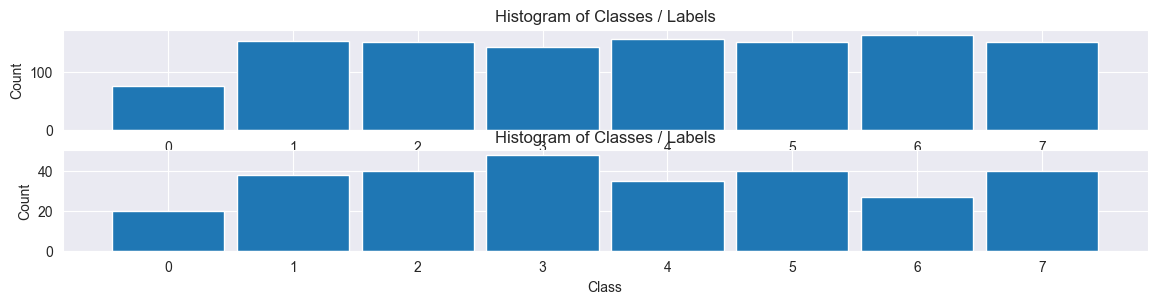

In [14]:
# featured_data,labels = Preprocessing(FRAME_LEN,HOP_LEN,N_MFCC)
f_featured_data = lib.Numpy2Pandas(all_features)
f_labels = pd.DataFrame(vY, columns=['Emotion'])
train_data,train_labels,test_data,test_labels = SplitData(f_featured_data,f_labels,trainRatio=0.8,plot=True)

In [25]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 150,
        'seed': 0
    }

In [32]:
def objective(space):
#     bst = XGBClassifier(n_estimators=150, learning_rate=0.1, objective='multi:softprob', reg_lambda=1)

    clf=XGBClassifier(n_estimators=150, learning_rate=0.1, objective='multi:softprob', max_depth = int(space['max_depth']), gamma = space['gamma'],
                      reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                      colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( train_data, train_labels), ( test_data, test_labels)]
    clf.fit(train_data, train_labels)
#     clf.fit(train_data, train_labels,
#             eval_set=evaluation, 
#             early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(test_data)
    accuracy = accuracy_score(test_labels, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [33]:

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.06944444444444445                                    
SCORE:                                                                             
0.06944444444444445                                                                
SCORE:                                                                             
0.25                                                                               
SCORE:                                                                             
0.06944444444444445                                                 
SCORE:                                                              
0.2534722222222222                                                  
SCORE:                                                                            
0.06944444444444445                                                               
SCORE:                                                                            
0.0694444444

In [34]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5356584072825294, 'gamma': 7.609918117562632, 'max_depth': 5.0, 'min_child_weight': 9.0, 'reg_alpha': 42.0, 'reg_lambda': 0.9399837022541785}


In [39]:
bst = XGBClassifier(n_estimators=200, learning_rate=0.1, objective='multi:softprob', reg_lambda=1)
# bst = XGBClassifier(n_estimators=180, learning_rate=0.1, objective='multi:softprob', reg_lambda=0.9399837022541785, reg_alpha=42.0, min_child_weight=9.0, max_depth=5, gamma=7.609918117562632, colsample_bytree=0.5356584072825294)
bst.fit(train_data, train_labels)
preds = bst.predict(test_data)
print(confusion_matrix(preds, test_labels))
accuracy = accuracy_score(test_labels, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
del bst

[[10  1  0  3  0  0  0  1]
 [ 2 33  2  7  0  0  2  1]
 [ 1  0 20  3  2 11  1  1]
 [ 3  2  1 19  3  3  2  2]
 [ 0  0  4  3 25  0  2  3]
 [ 0  0  5  4  1 23  1  3]
 [ 3  1  0  6  2  0 19  4]
 [ 1  1  8  3  2  3  0 25]]
Accuracy: 60.42%


Prediction Train Accuracy: 99.83 %
Prediction Test Accuracy: 46.88 %
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        20
           1       0.63      0.87      0.73        38
           2       0.35      0.30      0.32        40
           3       0.41      0.27      0.33        48
           4       0.56      0.43      0.48        35
           5       0.42      0.50      0.45        40
           6       0.47      0.63      0.54        27
           7       0.40      0.47      0.44        40

    accuracy                           0.47       288
   macro avg       0.47      0.47      0.46       288
weighted avg       0.46      0.47      0.46       288



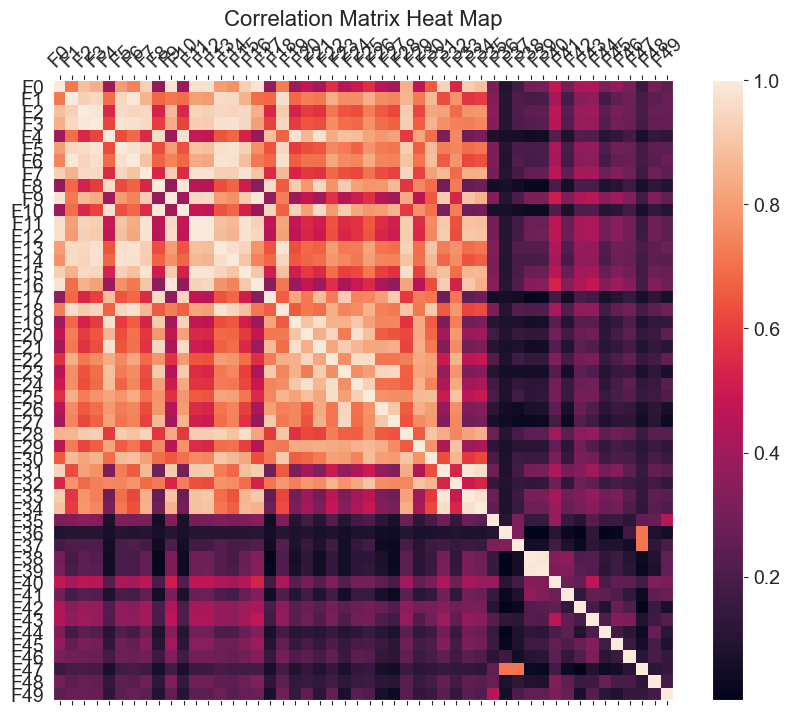

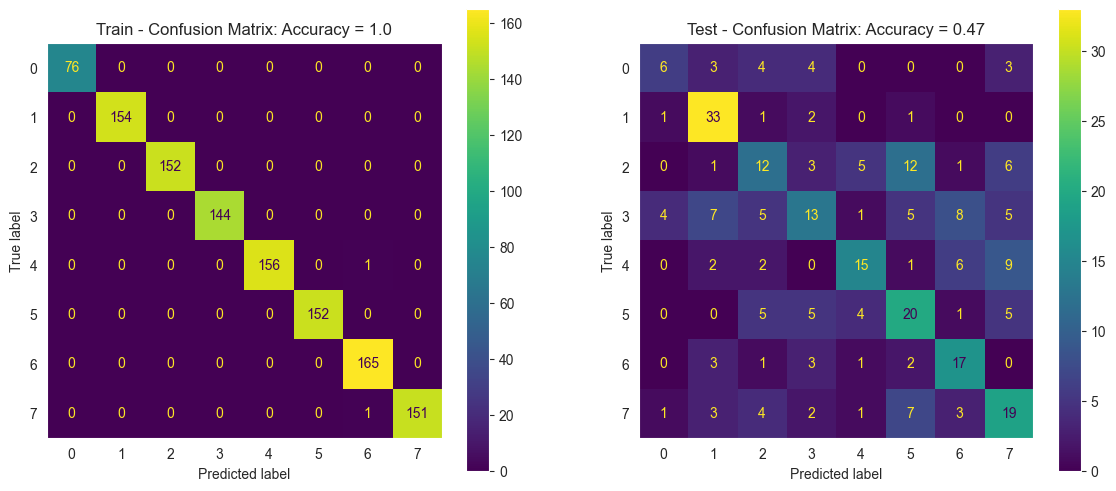

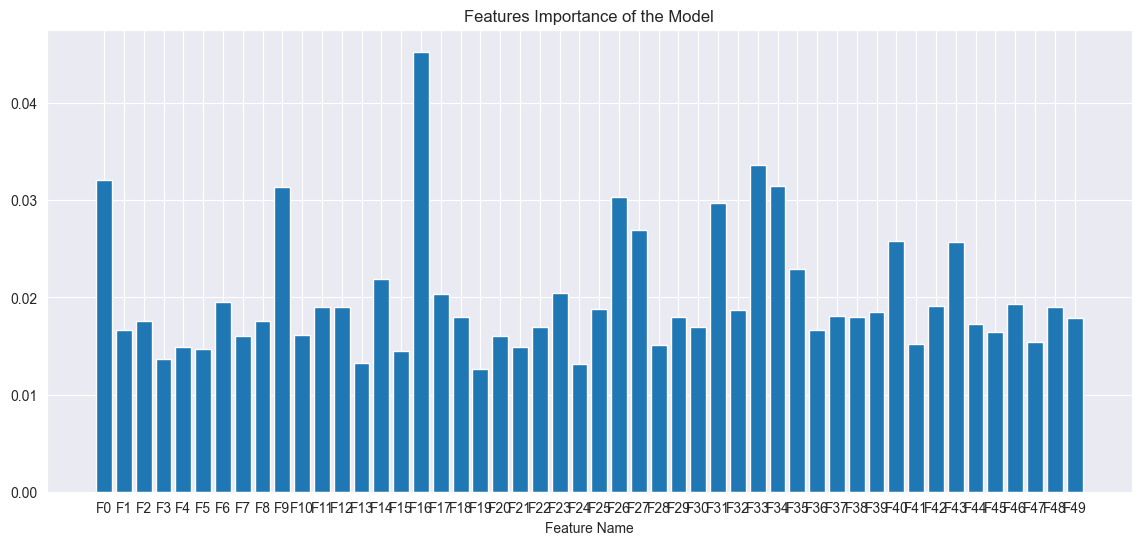

In [58]:
# Test ALL features with a model
report, score, corr_vec, feature_importance = TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=True)

In [49]:
def ExtractUnImportantFeatures(feature_importance,feature_importance_ratio_threshold):
    feature_importance_threshold = np.max(feature_importance) * feature_importance_ratio_threshold
    weak_features_indexes = np.where(feature_importance < feature_importance_threshold)[0]
    train_data = np.delete(train_data,weak_features_indexes,axis=1)
    test_data = np.delete(test_data,weak_features_indexes,axis=1)
    return train_data, test_data

In [50]:
def SelectFeatures(train_data,test_data,remove_features):
    train_data = train_data.drop(columns=remove_features)
    test_data = test_data.drop(columns=remove_features)
    '''
    # Select features
    delete_features_indexes = np.concatenate((np.arange(0,76),np.arange(146,241)),axis=0)
    train_data = np.delete(train_data,delete_features_indexes,axis=1)
    test_data = np.delete(test_data,delete_features_indexes,axis=1)
    print(f'Selected {train_data.shape[1]} features.')
    ''';
    return train_data, test_data

In [61]:
corr_thr = 0.5
feat_imp_ratio_thr = 0.2

corr_features = lib.ExtractCorrFeatures(corr_vec,corr_thr)
#ExtractUnImportantFeatures(feature_importance,feat_imp_ratio_thr)
remove_features = corr_features #[corr_features, ]
train_data_selected_features,test_data_selected_features = SelectFeatures(train_data,test_data,remove_features)
display(train_data_selected_features)

,F8,F17,F27,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49
630,-0.032279,0.372824,0.341583,-0.323500,-0.166248,-0.250834,-0.313157,-0.252764,-0.384665,-0.487388,0.151870,-0.347866,-0.453446,0.006873,-0.449524,-0.219984,-0.297890,-0.303495
932,0.223877,0.593986,1.165229,-0.320664,-0.170117,-0.205075,-0.507858,-0.513251,-0.516608,-0.480701,-0.412640,-0.306392,0.063318,0.108119,0.717939,-0.218958,-0.281723,-0.308595
122,-0.999540,0.029696,-0.355786,-0.321117,-0.133546,-0.157528,-0.037227,-0.049119,-0.520435,-0.476884,-0.351645,-0.506010,-0.274876,-0.423233,-0.284887,-0.180668,-0.282961,-0.307990
894,-1.083384,-0.758010,-1.140003,-0.320707,-0.154650,-0.213339,-0.413272,-0.435449,0.600476,-0.267823,-0.246360,-0.013902,-0.270559,-0.094285,-0.437791,-0.217084,-0.021801,-0.299992
1264,0.144236,-0.047407,-0.427945,-0.212999,0.326391,-0.128611,-0.344297,-0.372060,0.081383,-0.279433,0.379078,-0.428159,-0.309583,1.271220,-0.115545,0.123347,0.123968,-0.104391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1.037318,0.950415,0.707534,0.873781,-0.132877,-0.012035,1.013417,0.932681,2.326363,2.430752,3.020613,0.655391,5.625513,6.737998,1.335753,-0.118927,4.127813,0.643879
1261,1.018405,0.961010,0.908033,-0.023741,-0.098790,-0.080760,-0.201116,-0.147043,-0.519334,-0.466252,-0.403444,-0.502205,-0.502056,-0.465381,-0.416437,-0.157119,-0.297727,0.161588
643,-1.141803,-1.224682,-0.453201,-0.321500,-0.172478,-0.248779,-0.502952,-0.508353,-0.056937,-0.442513,-0.200722,-0.064095,-0.384234,-0.449579,-0.274701,-0.240029,-0.169827,-0.302285
360,0.966292,0.845583,0.888963,-0.310020,-0.142484,-0.162652,0.011675,0.044350,-0.075595,0.927228,0.765125,1.120156,-0.525879,0.103338,-0.204824,-0.222712,0.063332,-0.289210


Prediction Train Accuracy: 99.91 %
Prediction Test Accuracy: 33.68 %
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        20
           1       0.37      0.58      0.45        38
           2       0.21      0.17      0.19        40
           3       0.33      0.12      0.18        48
           4       0.40      0.40      0.40        35
           5       0.38      0.40      0.39        40
           6       0.37      0.52      0.43        27
           7       0.27      0.33      0.30        40

    accuracy                           0.34       288
   macro avg       0.33      0.35      0.33       288
weighted avg       0.33      0.34      0.32       288



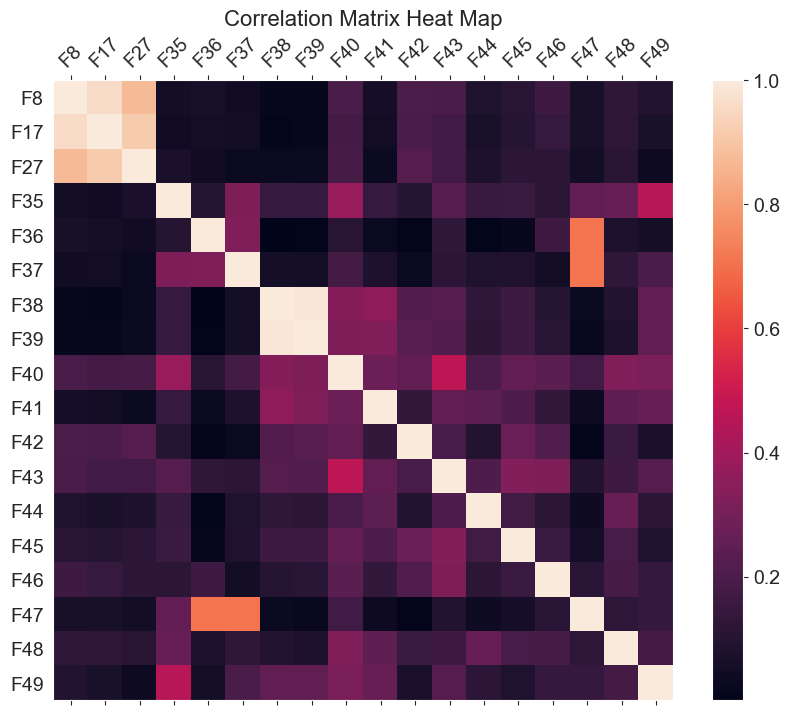

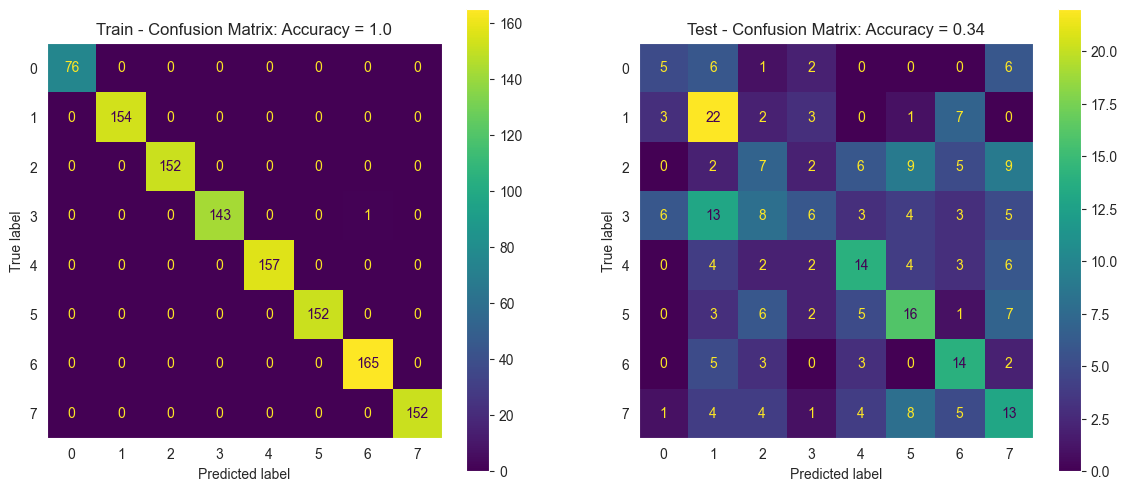

('              precision    recall  f1-score   support\n\n           0       0.33      0.25      0.29        20\n           1       0.37      0.58      0.45        38\n           2       0.21      0.17      0.19        40\n           3       0.33      0.12      0.18        48\n           4       0.40      0.40      0.40        35\n           5       0.38      0.40      0.39        40\n           6       0.37      0.52      0.43        27\n           7       0.27      0.33      0.30        40\n\n    accuracy                           0.34       288\n   macro avg       0.33      0.35      0.33       288\nweighted avg       0.33      0.34      0.32       288\n',
 0.3368055555555556,
          F0       F1        F2        F3        F4        F5        F6  \
 0  0.240671  0.23531  0.230119  0.230661  0.162427  0.197825  0.232185   
 
          F7        F8        F9       F10       F11       F12      F13  \
 0  0.228589  0.299723  0.217295  0.201276  0.262497  0.176649  0.20342   
 
      

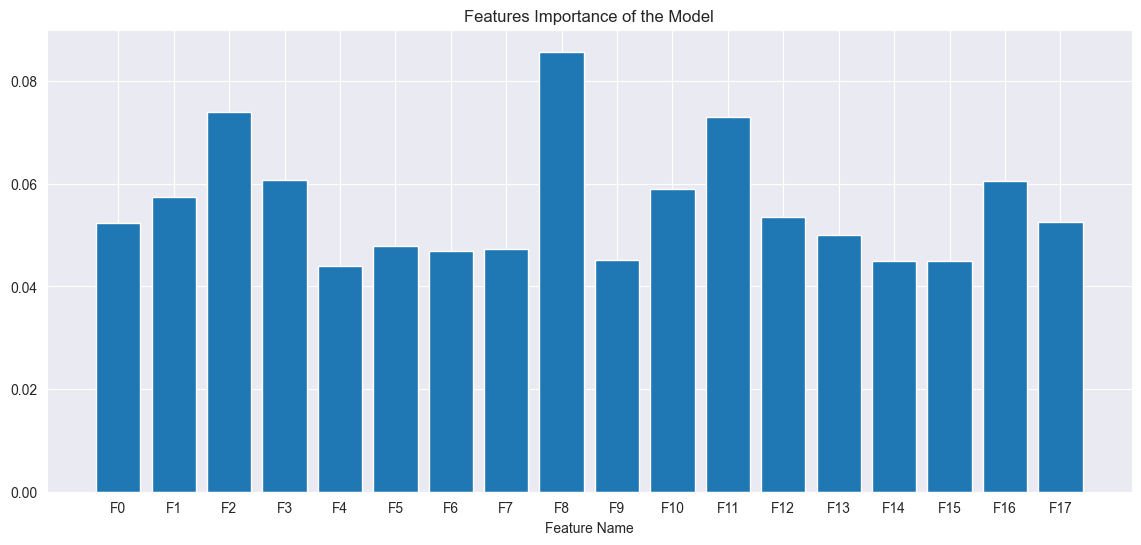

In [62]:
# Test SELECTED features with a model
TrainModelTestReport(train_data_selected_features,train_labels,test_data_selected_features,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=True)

In [19]:
from sklearn.linear_model import lars_path, lasso_path

dfX = train_data
dsY = train_labels
display(dfX.shape)
display(dsY.shape)

'''
# LASSO Path Analysis
alphasPath, coefsPath, *_ = lasso_path(dfX, dsY)
alphasPath = alphasPath.reshape(alphasPath.shape[0],1)
coefsPath = coefsPath[0,:,:]
display(alphasPath.shape)
display(coefsPath.shape)

# Display the LASSO Path
hF, hA = plt.subplots(figsize = (16, 8))
hA.plot(alphasPath, np.abs(coefsPath.T), lw = 2, label = dfX.columns.to_list())
hA.set_title('The Lasso Path')
hA.set_xlabel('$\lambda$')
hA.set_ylabel('Coefficient Value (${w}_{i}$)')
hA.legend()
plt.show()
'''

_, _, coefs = lars_path(dfX, dsY, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()


(9729, 14)

(9729, 1)

InvalidParameterError: The 'X' parameter of lars_path must be an instance of 'numpy.ndarray' or None. Got                F0          F1         F2         F3         F4         F5  \
10382 -285.285645  145.553787 -16.543827  37.238731 -27.950891  23.910240   
1478  -293.292114   62.236416  -1.038359 -16.587139 -24.775490  -2.677238   
820   -364.347748    9.687983 -37.160301  -5.405170 -17.035879 -16.591185   
5174  -354.429596  150.389526   4.996594  52.091881 -16.660252  29.692741   
10985 -413.938873  147.017258   3.283391  64.697159 -27.036728  44.958092   
...           ...         ...        ...        ...        ...        ...   
11736 -156.062469  117.606781 -14.470708   5.746669 -12.672039  -3.756937   
1181  -232.340866   26.362387 -44.412045 -13.781572 -24.415361 -16.152927   
3309  -220.067932   10.744669 -11.457032  16.313305  -9.655351   1.839708   
8552  -284.719940  134.133530  -5.046165  45.429279 -10.106569  11.831592   
12041 -176.001694   93.237587   0.163111  20.857525 -31.068155  -7.345767   

              F6         F7         F8         F9        F10        F11  \
10382 -23.246922  11.385692 -14.976941   1.985579   6.761418   0.167865   
1478  -18.401432   1.296830 -14.746309  -1.770433 -13.229950   1.607224   
820    -7.355330 -19.601971  -5.800355  -2.466752  -2.988663  13.611662   
5174   -8.403833  11.414982 -16.236652   3.125285   0.294085  -2.179473   
10985 -19.952524  17.542105 -11.359141   3.222290  -0.715137  -1.793164   
...          ...        ...        ...        ...        ...        ...   
11736 -26.349960  -0.551657  -8.646484 -12.662316   1.919295  -4.406510   
1181  -11.197783 -22.917595  -5.976983   3.022697  -8.858768   8.709539   
3309   -8.306519  -8.230291  -6.291684   9.253564 -18.592497   6.994550   
8552  -23.217527  11.335376  -3.081658  -1.102173  -3.368490  -5.354664   
12041 -17.953751  -8.496407 -18.000998  -3.986116  -6.087066  -5.341669   

            F12        F13  
10382  4.550120  -7.779134  
1478  -7.077021   6.737925  
820    7.597210  13.059493  
5174   4.304177  -9.589483  
10985  7.437125 -12.603674  
...         ...        ...  
11736 -8.181788  -1.924236  
1181   1.548879  17.448935  
3309  -1.534085   1.893120  
8552   2.056875  -3.354664  
12041 -5.685608  -6.084415  

[9729 rows x 14 columns] instead.

In [11]:
def DataProcessing(frame_len,hop_len,N, plot):
    featured_data,labels = Preprocessing(frame_len,hop_len,N)
    train_data,train_labels,test_data,test_labels = SplitData(featured_data,labels,trainRatio=0.8,plot=plot)

    # Test features with a simple model
    report, score, corr_vec, feature_importance = TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1, plot=plot)
    return report, score, feature_importance, train_data,train_labels,test_data,test_labels

In [ ]:
report, score, feature_importance, train_data,train_labels,test_data,test_labels = DataProcessing(FRAME_LEN,HOP_LEN,N, plot=True)

In [10]:
def TestImportantFeatures(feature_importance,feature_importance_threshold,train_data,train_labels,test_data,test_labels):
    # Remove weak features
    weak_features_indexes = np.where(feature_importance < feature_importance_threshold)[0]
    train_data = np.delete(train_data,weak_features_indexes,axis=1)
    test_data = np.delete(test_data,weak_features_indexes,axis=1)
    display(train_data.shape[1])

    # Test  again after removing not important features
    TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=100,min_samples_split=6,random_state=1)

In [ ]:
TestImportantFeatures(feature_importance,0.06,train_data,train_labels,test_data,test_labels)

## Search for best Classifier (with different hyperparameters)